In [1]:
import librosa
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import scipy.signal as sps
from tabulate import tabulate
import pandas as pd
import statistics as stats

# Prediction and Quantization
A simple signal processing system and its evaluation using commonly found metrics in signal processing and communications.

Parts
1. Using an IIR filter for "one-step-ahead" prediction
2. Using a quantizer to discretize sample values
3. Putting it all together
4. Bonus: Comparing performance

In [9]:
def signal_gen(frequency, amplitude, phase_degrees, duration, Fs):
    phase = phase_degrees * np.pi/180
    t  = np.arange(0,duration, 1/Fs) # X axis: Time & Samples
    return amplitude*np.sin(2*np.pi*frequency*t+phase), t

def dB(voltage):
    return 20 * np.log10(voltage)

def predict(signal, order):
    numerator = librosa.lpc(x, order) # Linear Filter Poles
    denominator = [1] 
    perr = sps.lfilter(numerator, denominator, x) 
    x_hat = x - perr
    print('Optimal coefficients: ' + str(numerator))
    return (x_hat, perr, numerator)

### Example Predictor

Optimal coefficients: [ 1.         -0.28345083  0.7715677 ]


(-5, 5)

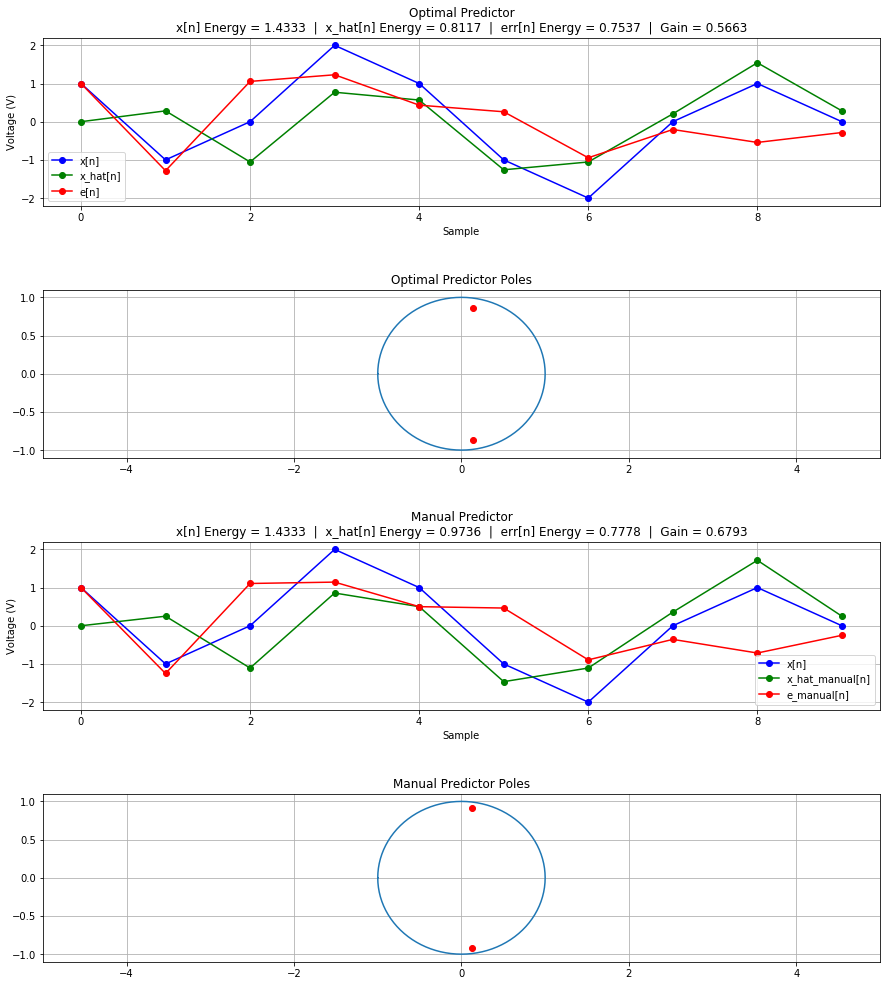

In [10]:
n = np.arange(0,10)
x = np.array([1.0,-1.0,0.0,2.0,1.0,-1.0,-2.0,0.0,1.0,0.0])
a_manual = [1.0000,-0.2500,0.8570]


# Optimal Coefficients
x_hat, perr, a = predict(x,2)


# Manual Coefficients
denominator  = [1] 
perr_manual  = sps.lfilter(a_manual, denominator, x) 
x_hat_manual = x - perr_manual


# Energy (variance of zero-mean signal = energy)
var_x     = stats.variance(x)
var_x_hat = stats.variance(x_hat)
var_perr  = stats.variance(perr)
var_x_hat_manual = stats.variance(x_hat_manual)
var_perr_manual  = stats.variance(perr_manual)


# Prediction gain calculation (E_prediction/E_x)
optimal_gain = var_x_hat/var_x
manual_gain  = var_x_hat_manual/var_x


# Obtaining Poles and zeroes of the filter
(zeroes_optimal, poles_optimal, k) = sps.tf2zpk(1,a)
(zeroes_manual, poles_manual, k) = sps.tf2zpk(1,a_manual)

# # Printer
# print('Linear Filter poles: '+ str(np.round(b,4))+'\n')
# 
# col = ['x','x_hat','err']
# data = np.round(np.append([x],[x_hat,perr], axis=0), 4)
# df = pd.DataFrame(data, index=col)
# print(df)
# 
# col = ['x','x_hat_manual','err_manual']
# data = np.round(np.append([x],[x_hat_manual,perr_manual], axis=0), 4)
# df = pd.DataFrame(data, index=col)
# print(df)


# Graph
plt.figure('position', [15,17])
plt.subplots_adjust(hspace = 0.5)

plt.subplot(4,1,1)
plt.title('Optimal Predictor\n' 
         +'x[n] Energy = ' + str(np.round(var_x, 4)) + '  |  ' 
         +'x_hat[n] Energy = ' + str(np.round(var_x_hat, 4)) + '  |  ' 
         +'err[n] Energy = ' + str(np.round(var_perr, 4)) + '  |  '
         + 'Gain = ' + str(np.round(optimal_gain, 4)))
plt.plot(n, x, 'b-o', label='x[n]')
plt.plot(n, x_hat, 'g-o', label='x_hat[n]')
plt.plot(n, perr, 'r-o', label='e[n]')
plt.ylabel('Voltage (V)')
plt.xlabel('Sample')
plt.grid()
plt.legend()

plt.subplot(4,1,2)
theta = np.linspace(-np.pi,np.pi,201)
plt.plot(np.cos(theta),np.sin(theta))
plt.scatter(np.real(zeroes_optimal),np.imag(zeroes_optimal))
plt.scatter(np.real(poles_optimal),np.imag(poles_optimal), color='r')
plt.title("Optimal Predictor Poles")
plt.grid()
plt.xlim(-5,5)

plt.subplot(4,1,3)
plt.title('Manual Predictor\n'
         +'x[n] Energy = ' + str(np.round(var_x, 4)) + '  |  ' 
         +'x_hat[n] Energy = ' + str(np.round(var_x_hat_manual, 4)) + '  |  ' 
         +'err[n] Energy = ' + str(np.round(var_perr_manual, 4)) + '  |  '
         + 'Gain = ' + str(np.round(manual_gain, 4)))
plt.plot(n, x, 'b-o', label='x[n]')
plt.plot(n, x_hat_manual, 'g-o', label='x_hat_manual[n]')
plt.plot(n, perr_manual, 'r-o', label='e_manual[n]')
plt.ylabel('Voltage (V)')
plt.xlabel('Sample')
plt.grid()
plt.legend()

plt.subplot(4,1,4)
theta = np.linspace(-np.pi,np.pi,201)
plt.plot(np.cos(theta),np.sin(theta))
plt.scatter(np.real(zeroes_manual),np.imag(zeroes_manual))
plt.scatter(np.real(poles_manual),np.imag(poles_manual), color='r')
plt.title("Manual Predictor Poles")
plt.grid()
plt.xlim(-5,5)

### Predictor with .wav file

Optimal coefficients: [ 1.         -1.90764194  0.96751244]


(-5, 5)

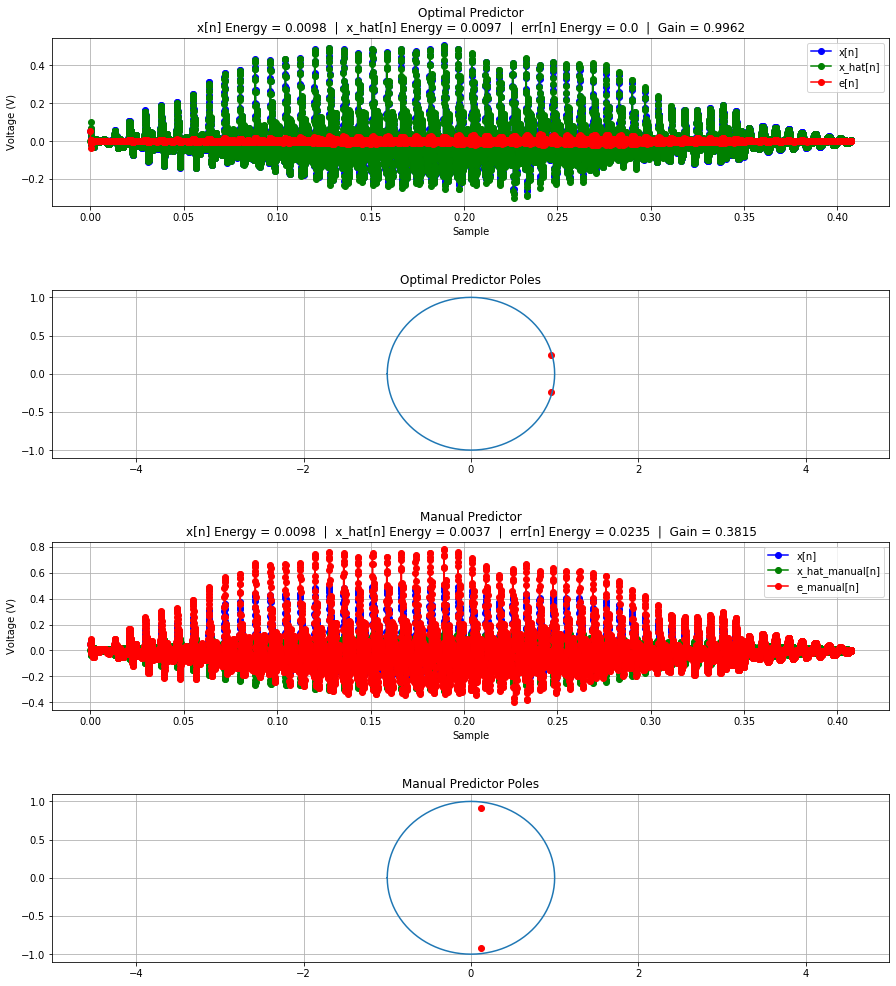

In [12]:
# Importing the signal
x, sr = librosa.load('snip.wav') # Signal time series and sampling rate
x = np.ndarray.tolist(x)
x = np.array(x)
duration = np.size(x)/sr
period = 1/sr
n = np.arange(0,duration, period)


# Coefficients
a_manual = [1.0000,-0.2500,0.8570]
x_hat, perr, a = predict(x,2)


# Manual Coefficients
denominator  = [1] 
perr_manual  = sps.lfilter(a_manual, denominator, x) 
x_hat_manual = x - perr_manual


# Energy (variance of zero-mean signal = energy)
var_x     = stats.variance(x)
var_x_hat = stats.variance(x_hat)
var_perr  = stats.variance(perr)
var_x_hat_manual = stats.variance(x_hat_manual)
var_perr_manual  = stats.variance(perr_manual)


# Prediction gain calculation (E_prediction/E_x)
optimal_gain = var_x_hat/var_x
manual_gain  = var_x_hat_manual/var_x


# Obtaining Poles and zeroes of the filter
(zeroes_optimal, poles_optimal, k) = sps.tf2zpk(1,a)
(zeroes_manual, poles_manual, k) = sps.tf2zpk(1,a_manual)


# Graph
plt.figure('position', [15,17])
plt.subplots_adjust(hspace = 0.5)

plt.subplot(4,1,1)
plt.title('Optimal Predictor\n' 
         +'x[n] Energy = ' + str(np.round(var_x, 4)) + '  |  ' 
         +'x_hat[n] Energy = ' + str(np.round(var_x_hat, 4)) + '  |  ' 
         +'err[n] Energy = ' + str(np.round(var_perr, 4)) + '  |  '
         + 'Gain = ' + str(np.round(optimal_gain, 4)))
plt.plot(n, x, 'b-o', label='x[n]')
plt.plot(n, x_hat, 'g-o', label='x_hat[n]')
plt.plot(n, perr, 'r-o', label='e[n]')
plt.ylabel('Voltage (V)')
plt.xlabel('Sample')
plt.grid()
plt.legend()

plt.subplot(4,1,2)
theta = np.linspace(-np.pi,np.pi,201)
plt.plot(np.cos(theta),np.sin(theta))
plt.scatter(np.real(zeroes_optimal),np.imag(zeroes_optimal))
plt.scatter(np.real(poles_optimal),np.imag(poles_optimal), color='r')
plt.title("Optimal Predictor Poles")
plt.grid()
plt.xlim(-5,5)

plt.subplot(4,1,3)
plt.title('Manual Predictor\n'
         +'x[n] Energy = ' + str(np.round(var_x, 4)) + '  |  ' 
         +'x_hat[n] Energy = ' + str(np.round(var_x_hat_manual, 4)) + '  |  ' 
         +'err[n] Energy = ' + str(np.round(var_perr_manual, 4)) + '  |  '
         + 'Gain = ' + str(np.round(manual_gain, 4)))
plt.plot(n, x, 'b-o', label='x[n]')
plt.plot(n, x_hat_manual, 'g-o', label='x_hat_manual[n]')
plt.plot(n, perr_manual, 'r-o', label='e_manual[n]')
plt.ylabel('Voltage (V)')
plt.xlabel('Sample')
plt.grid()
plt.legend()

plt.subplot(4,1,4)
theta = np.linspace(-np.pi,np.pi,201)
plt.plot(np.cos(theta),np.sin(theta))
plt.scatter(np.real(zeroes_manual),np.imag(zeroes_manual))
plt.scatter(np.real(poles_manual),np.imag(poles_manual), color='r')
plt.title("Manual Predictor Poles")
plt.grid()
plt.xlim(-5,5)

### Answer the following questions
i. What is the difference between the optimal and non-optimal predictor coefficients in terms of the energy of the predicted (x_hat[n]) and error (e[n]) sequences? 

| Signal|  Optimal     | Non-optimal |
|:-----:|:------------:| -----:|
| x_hat | practicalt 1 | Drastically reduced |
| error | Just about 0 | Increased slightly |

ii. How does the optimal predictor improve the outcomes (think in terms of dB relative to the original sequence, or prediction gain)  

iii. Why does the prediction gain improve when using the optimal predictor vs. the non-optimal predictor?  

iv. What should happen to the prediction gain if you increase the order of the prediction filter?  

Can you increase the order of the filter “too much” … ? Explain what happens, and why.  
